In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Keep only the working imports for SKLearn functionality
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv('C:/Users/muthu/CYBERPROJECT/data/raw/Phishing_Email.csv/Phishing_Email.csv')

# Run initial inspection
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [18]:
df.isnull().sum()


Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

--- Data Dimension After Cleaning ---
Rows: 18650, Columns: 3


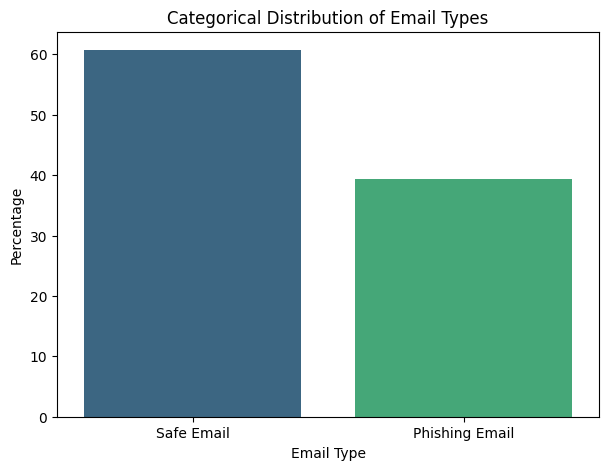

In [19]:
# Assuming your target variable is 'Email Type' and you have cleaned/dropped rows
# Let's check the current distribution after cleaning (Section 4.1)

print("--- Data Dimension After Cleaning ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Calculate the balance for visualization
balance_df = df['Email Type'].value_counts(normalize=True) * 100

# Visualize the class balance
plt.figure(figsize=(7, 5))
sns.barplot(x=balance_df.index, y=balance_df.values, palette='viridis')
plt.title('Categorical Distribution of Email Types')
plt.ylabel('Percentage')
plt.xlabel('Email Type')
plt.show()

In [20]:


# --- Essential Data Cleaning Before Text Processing ---

# 1. Drop the redundant index column (if it still exists)
if 'Unnamed: 0' in df.columns:
    df.drop(["Unnamed: 0"], axis=1, inplace=True)
    print("Dropped 'Unnamed: 0'.")

# 2. DROP ROWS WITH NULLS in the critical 'Email Text' column
# This step is CRUCIAL to fix the TypeError
df.dropna(subset=['Email Text'], inplace=True)
print("Dropped rows where 'Email Text' was null.")

# 3. Drop any duplicate rows
df.drop_duplicates(inplace=True)

# Check the new shape and data types
print(f"\nNew DataFrame Dimension: {df.shape}")
print(df.info())

Dropped 'Unnamed: 0'.
Dropped rows where 'Email Text' was null.

New DataFrame Dimension: (17538, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 17538 entries, 0 to 18648
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  17538 non-null  object
 1   Email Type  17538 non-null  object
dtypes: object(2)
memory usage: 411.0+ KB
None


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muthu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


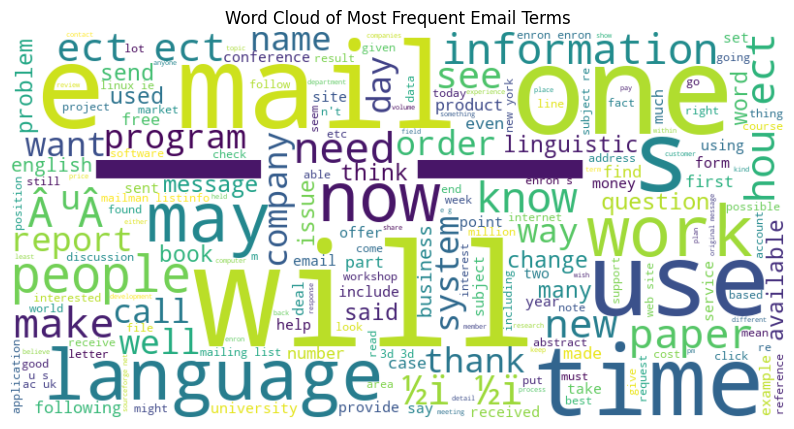

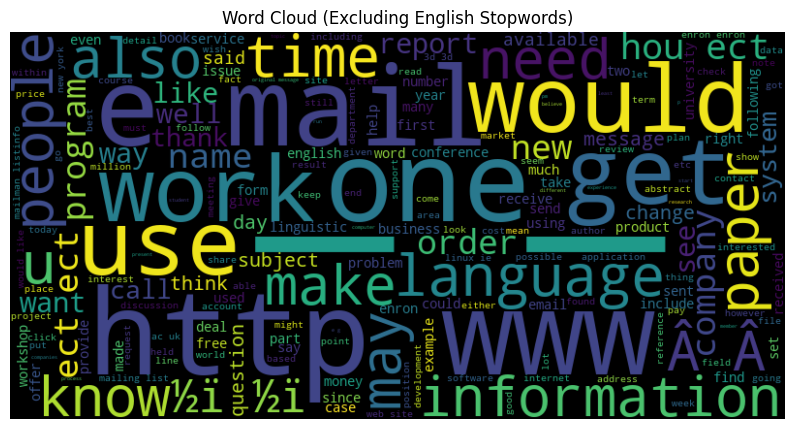

In [21]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# You may need to run this command once to download the stopwords list
import nltk
nltk.download('stopwords') 

# 2a. WordCloud for all words
all_mails = " ".join(df['Email Text'])
word_cloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_mails)

plt.figure(figsize=(10, 6))
plt.imshow(word_cloud_all, interpolation='bilinear')
plt.title('Word Cloud of Most Frequent Email Terms')
plt.axis("off")
plt.show()


# 2b. WordCloud excluding English stopwords
stop_words_english = set(stopwords.words('english'))
word_cloud_stop = WordCloud(stopwords=stop_words_english, width=800, height=400, background_color='black').generate(all_mails)

plt.figure(figsize=(10, 6))
plt.imshow(word_cloud_stop, interpolation='bilinear')
plt.title('Word Cloud (Excluding English Stopwords)')
plt.axis("off")
plt.show()